## Loaing the data


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
# Evaluation metrics related methods
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score

import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
pandoc --version

NameError: name 'pandoc' is not defined

In [4]:
! pip install PyPDF2

In [ ]:
https://pandoc.org/installing.html
    

In [2]:
pip install  -U notebook-as-pdf

                                              0.0/83.4 kB ? eta -:--:--
     --------------                           30.7/83.4 kB 1.4 MB/s eta 0:00:01
     --------------                           30.7/83.4 kB 1.4 MB/s eta 0:00:01
     --------------                           30.7/83.4 kB 1.4 MB/s eta 0:00:01
     -------------------------------------  81.9/83.4 kB 383.3 kB/s eta 0:00:01
     -------------------------------------- 83.4/83.4 kB 335.5 kB/s eta 0:00:00
                                              0.0/232.6 kB ? eta -:--:--
     ----                                  30.7/232.6 kB 640.0 kB/s eta 0:00:01
     ------                                41.0/232.6 kB 487.6 kB/s eta 0:00:01
     ------                                41.0/232.6 kB 487.6 kB/s eta 0:00:01
     --------------                        92.2/232.6 kB 435.7 kB/s eta 0:00:01
     -----------------                    112.6/232.6 kB 435.7 kB/s eta 0:00:01
     -----------------                    112.6/232.6 k

In [5]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.


In [3]:
jupyter nbconvert --to html notebook.ipynb 

SyntaxError: invalid syntax (207891711.py, line 1)

In [2]:
! choco install pandoc


'choco' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
churn_df = pd.read_csv('C:\\Users\\USER\\Documents\\Bank Customer Churn Prediction.csv')

In [3]:
churn_df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# EDA

In [4]:
churn_df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
credit_score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
products_number,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
credit_card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
churn,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [5]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [6]:
# lets check the data types of the data
churn_df.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [7]:
# lets check the dimension of the data
churn_df.shape
# we see that we have 10000 rows and 12 columns

(10000, 12)

In [8]:
# lets chceck the number of null numbers
churn_df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [9]:
churn_df.duplicated().sum()

0

In [10]:
churn_df.columns.to_list()

['customer_id',
 'credit_score',
 'country',
 'gender',
 'age',
 'tenure',
 'balance',
 'products_number',
 'credit_card',
 'active_member',
 'estimated_salary',
 'churn']

In [11]:
churn_df1 =churn_df.drop(['country','gender'],axis=1)





# visualization

C:\Users\USER\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

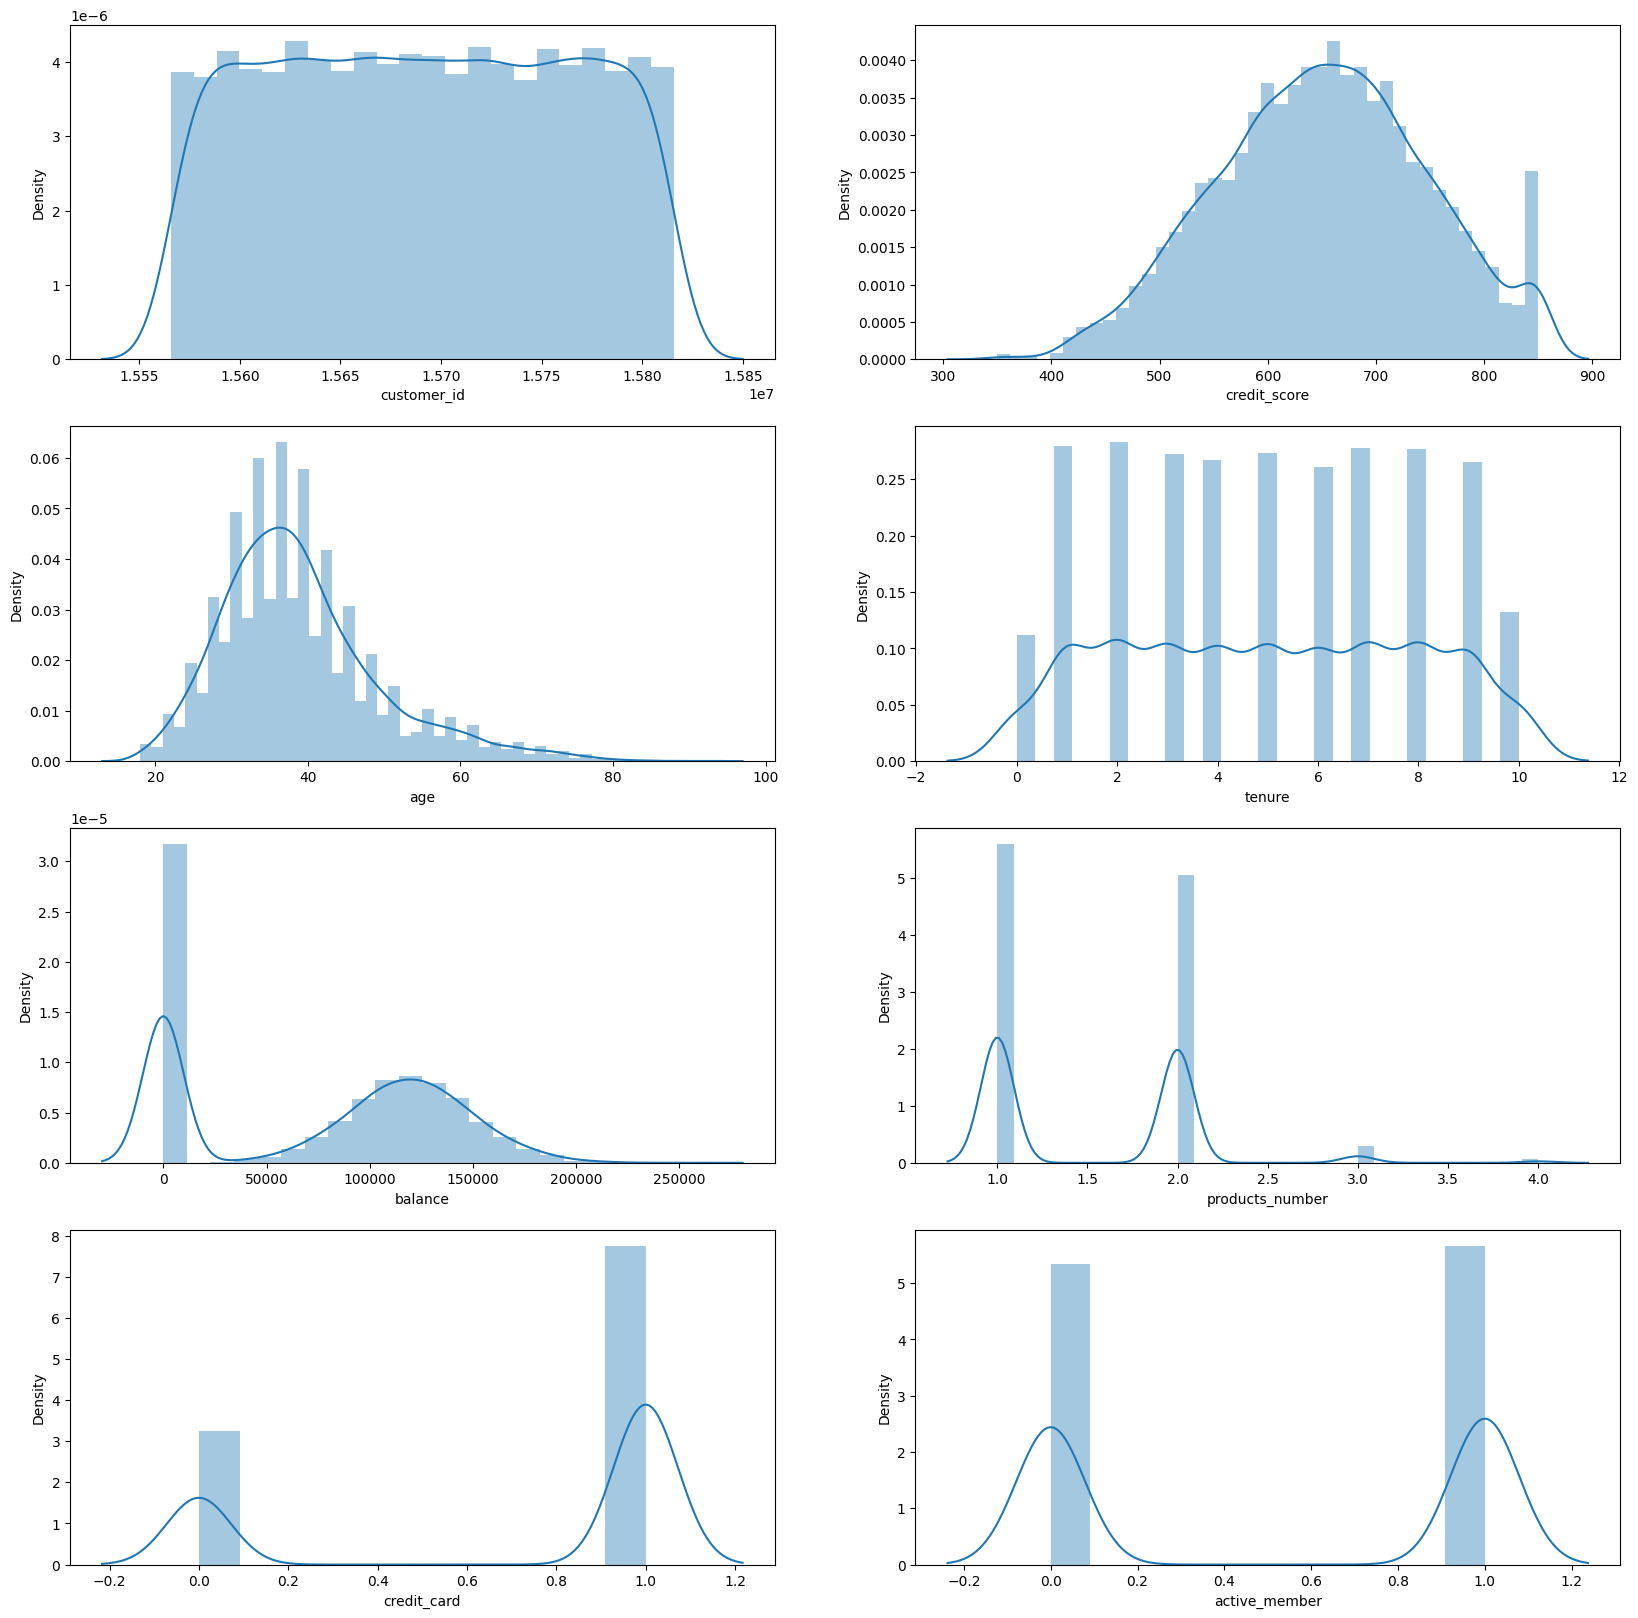

In [12]:
fig, axes = plt.subplots(nrows = 4, ncols = 2)    
axes = axes.flatten()         
fig.set_size_inches(20,20)

for ax, col in zip(axes, churn_df1.columns):
  sns.distplot(churn_df[col], ax = ax)

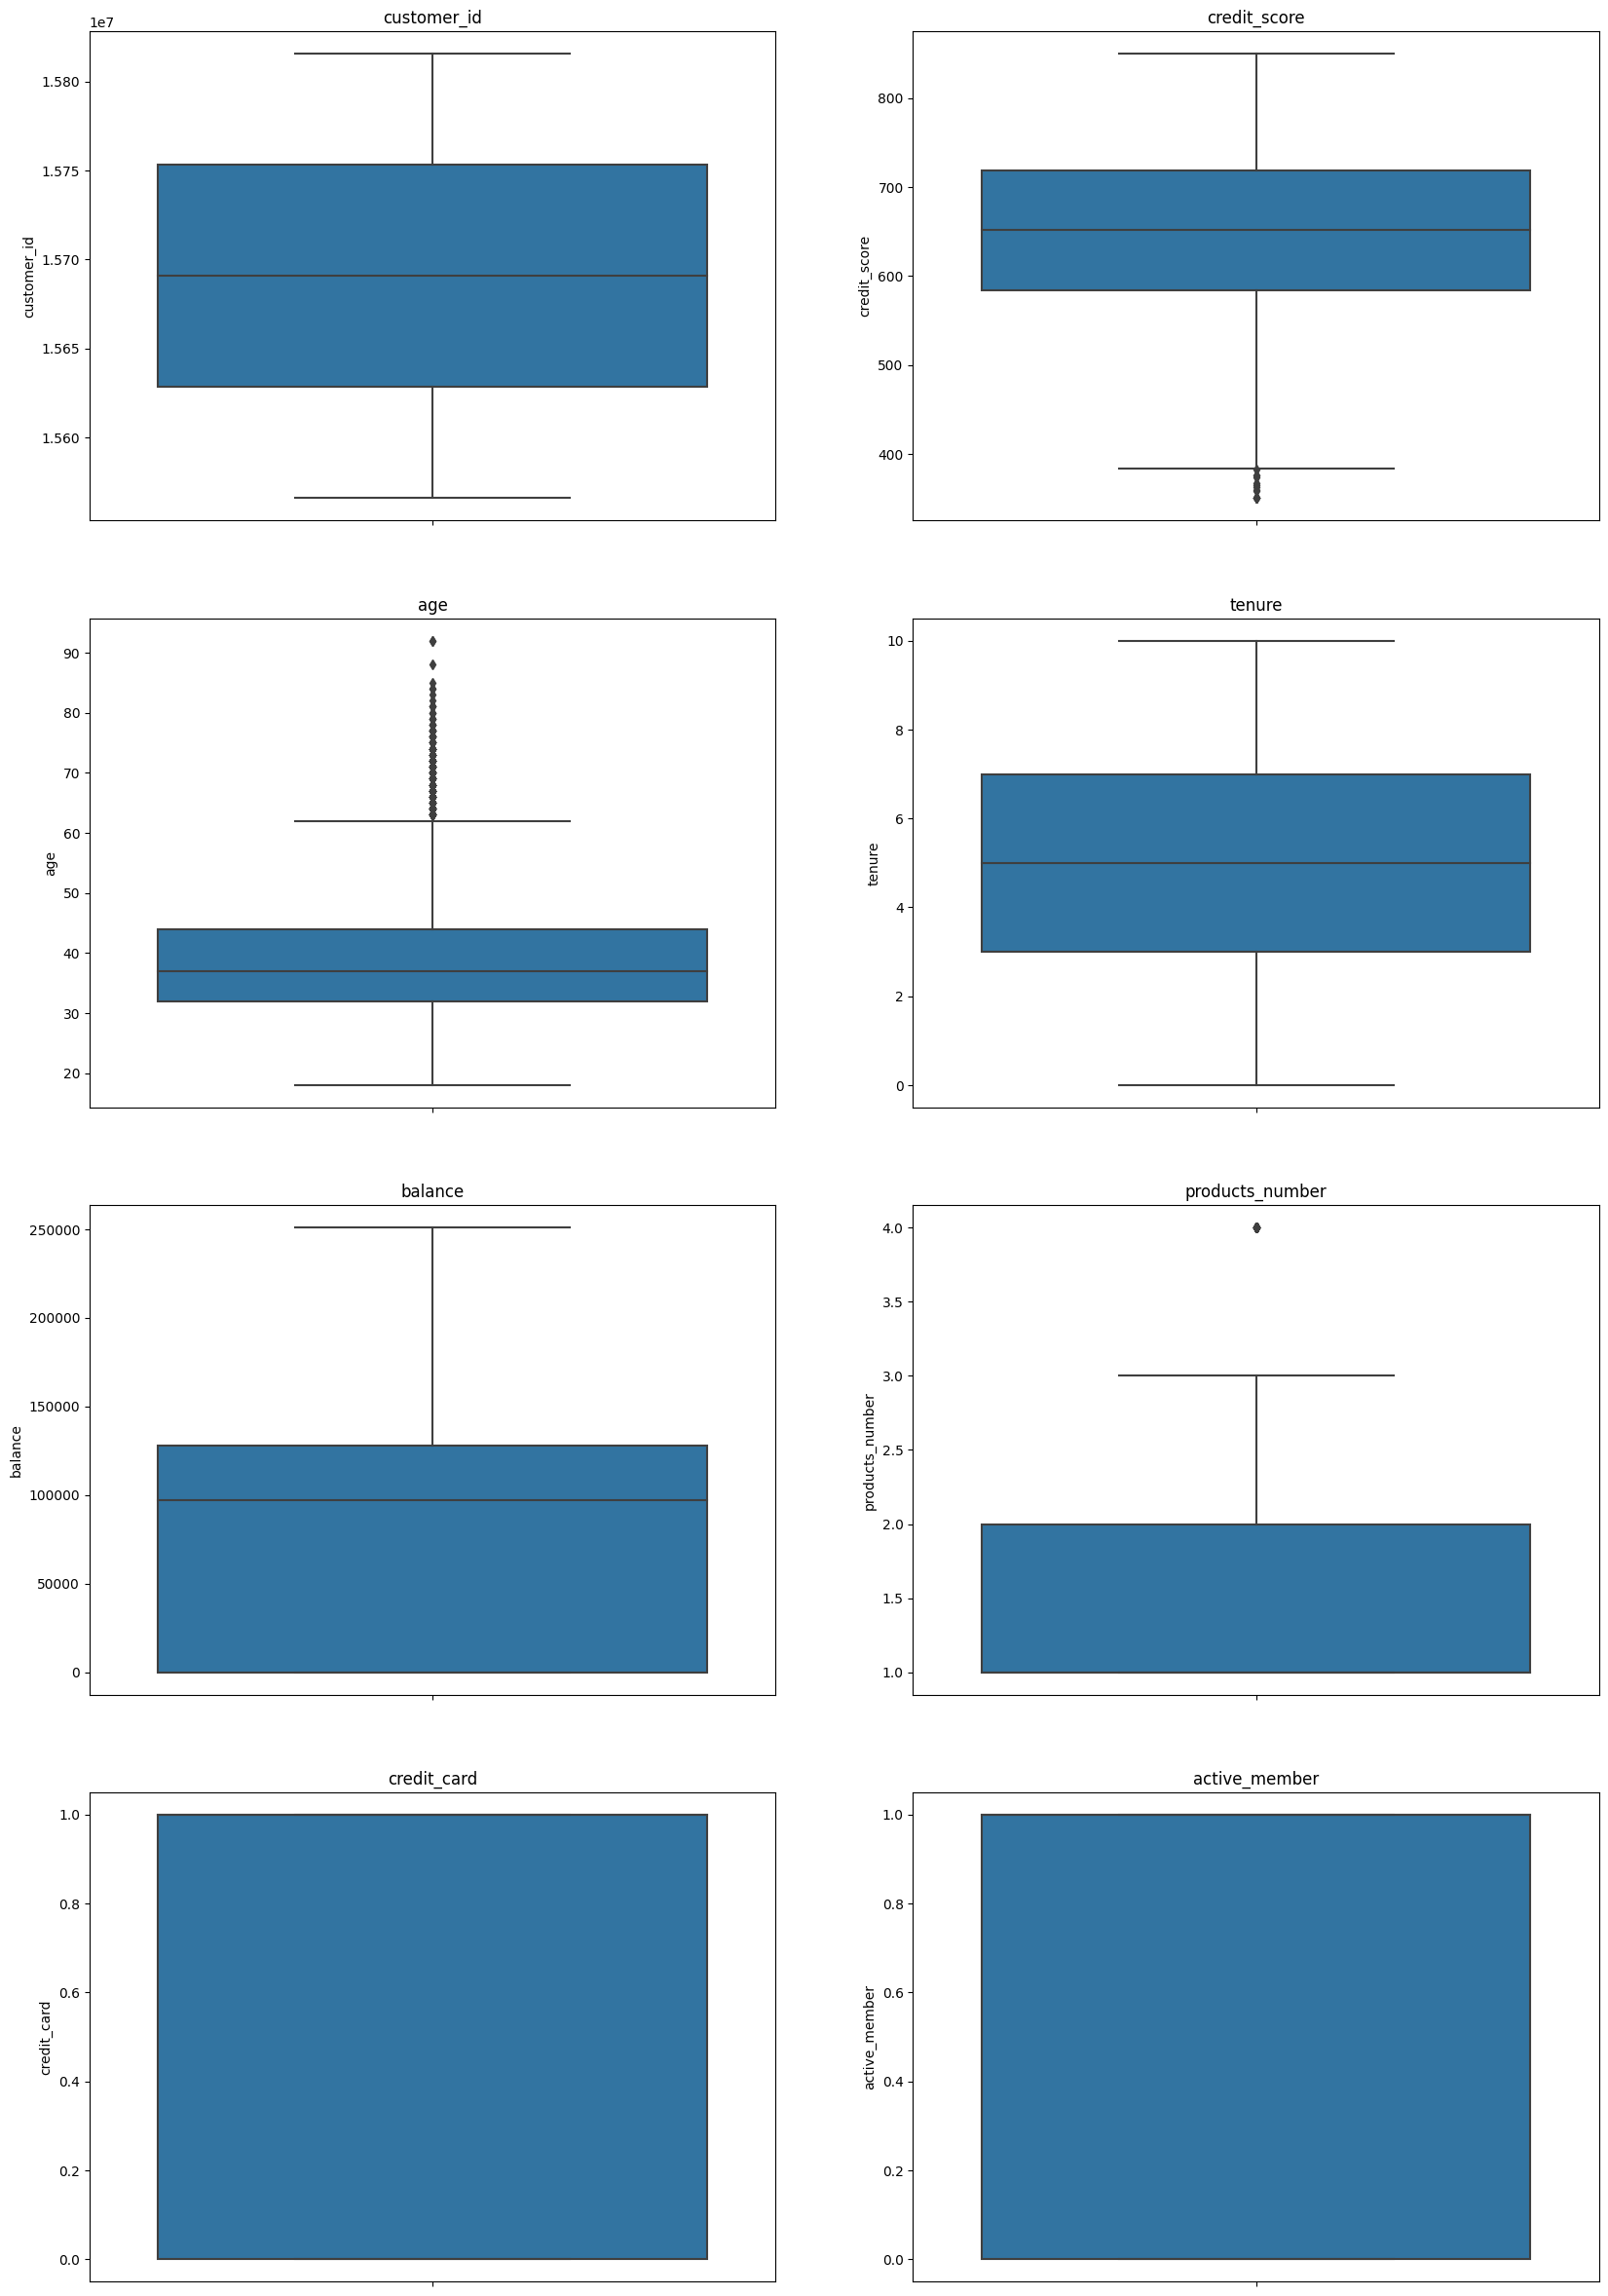

In [13]:
fig, axes = plt.subplots(nrows = 4, ncols = 2)    
axes = axes.flatten()         
fig.set_size_inches(20,30)

for ax, col in zip(axes, churn_df1.columns):
  sns.boxplot(y=churn_df1[col], hue='churn', ax = ax , data=churn_df1)
  ax.set_title(col)

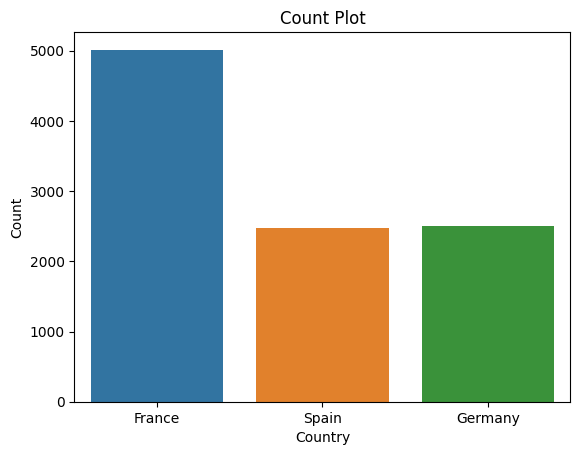

In [14]:
sns.countplot(data=churn_df, x='country')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Count Plot')

# Show the plot
plt.show()

<Axes: xlabel='country', ylabel='Count'>

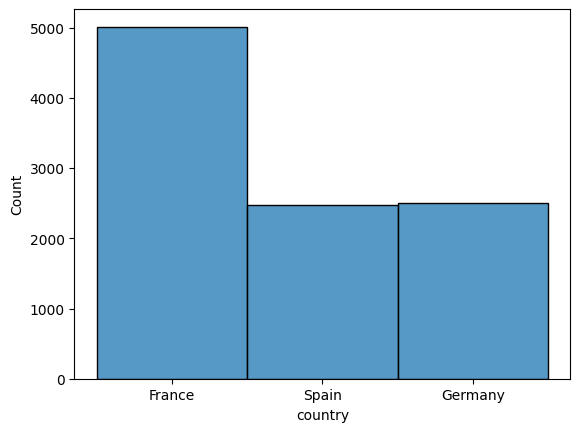

In [15]:
sns.histplot(x= 'country', data = churn_df)

<Axes: xlabel='credit_score', ylabel='balance'>

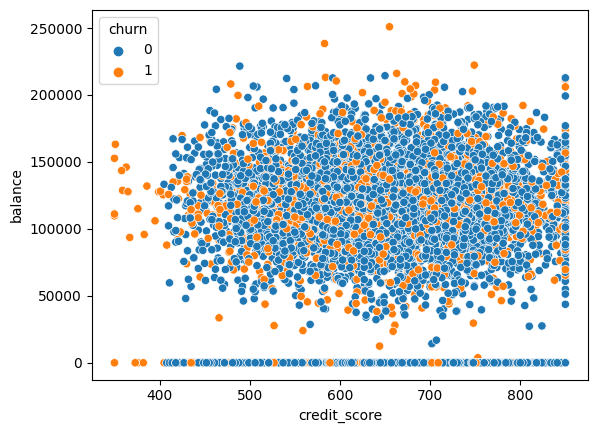

In [88]:
sns.scatterplot(x ='credit_score', y='balance', hue= 'churn', data= churn_df)

<Axes: xlabel='estimated_salary', ylabel='credit_score'>

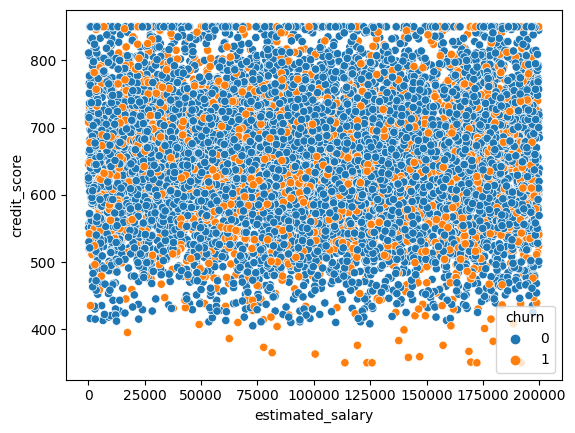

In [86]:
sns.scatterplot(x ='estimated_salary', y='credit_score', hue= 'churn', data= churn_df)

lets check the different value of country and gender as they are the only non numbers in the column

In [17]:
churn_df['country'].unique(),churn_df['gender'].unique()

(array(['France', 'Spain', 'Germany'], dtype=object),
 array(['Female', 'Male'], dtype=object))

In [18]:
churn_df.drop(['customer_id'], axis=1, inplace=True)
churn_df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


We need to covert the object data to integers

In [19]:
# coverting our categorical data to numbers
churn_df['country'] = LabelEncoder().fit_transform(churn_df['country'])
churn_df['gender'] = LabelEncoder().fit_transform(churn_df['gender'])

In [20]:
churn_df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [21]:
X=churn_df.drop(['churn'],axis=1)
y=churn_df['churn']

In [22]:
X.sample(10)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
7917,613,1,1,38,9,126265.88,2,0,0,15859.95
6596,477,0,1,22,5,82559.42,2,0,0,163112.90
9701,678,2,1,38,3,124483.53,1,1,0,126253.31
3483,499,2,1,39,6,0.00,2,1,1,81409.00
6704,436,1,1,45,3,104339.11,2,1,1,183540.22
4452,812,2,0,49,8,66079.45,2,0,0,91556.57
1886,667,2,1,39,7,167557.12,1,1,1,41183.02
3554,658,2,1,36,1,0.00,2,0,1,84927.42
5289,613,2,1,19,5,0.00,1,1,1,176903.35
9005,745,2,0,38,7,0.00,2,1,1,194230.82


We can sse that our categoriacal values have been represented with digits. For country 0:france, 1:Germany, 2:spain, country, 0:female, 1:Male.

## Test/Train 



In [23]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (6000, 10) (6000,)
Test set: (4000, 10) (4000,)


In [24]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

## LOGISTIC REGRESSION

In [25]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression().fit(X_train,y_train)
LR

LogisticRegression()

In [26]:
pred_lr =LR.predict(X_test)
pred_lr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [27]:
score_log=accuracy_score(y_test,pred_lr)
score_log

0.79825

In [28]:
evaluate_metrics(y_test, pred_lr)

{'accuracy': 0.79825,
 'recall': 0.05717916137229987,
 'precision': 0.4090909090909091,
 'f1score': 0.1003344481605351}

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter (inverse of regularization strength)
    'solver': ['lbfgs', 'liblinear', 'saga']  # Optimization algorithm
}


In [31]:
logreg = LogisticRegression(max_iter=1000, random_state=4)
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

In [32]:
grid_search.fit(X_train, y_train)


C:\Users\USER\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=4),
             param_grid={'C': [0.1, 1, 10],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             scoring='accuracy')

In [33]:
best_params = grid_search.best_params_
best_logreg = grid_search.best_estimator_


In [74]:

y_pred = best_logreg.predict(X_test)
evaluate_metrics(y_test, y_pred)

C:\Users\USER\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.80325, 'recall': 0.0, 'precision': 0.0, 'f1score': 0.0}

## Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
n_estimators=20
model = RandomForestClassifier()

In [46]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [47]:
pred_rf =model.predict(X_test)
pred_rf[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [48]:
evaluate_metrics(y_test, pred_rf)

{'accuracy': 0.86775,
 'recall': 0.4777636594663278,
 'precision': 0.7611336032388664,
 'f1score': 0.5870413739266198}

Improving our model by using hyperparameters with GridSearchCV 

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],    # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],   # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  
}

In [51]:
rf  = RandomForestClassifier()
rf

RandomForestClassifier()

In [52]:
rf_Grid = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')

In [53]:
rf_Grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [54]:
best_params = rf_Grid.best_params_
best_rf_model =rf_Grid.best_estimator_

In [55]:
pred_rf=best_rf_model.predict(X_test)
pred_rf

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [56]:
evaluate_metrics(y_test, pred_rf)

{'accuracy': 0.86725,
 'recall': 0.4701397712833545,
 'precision': 0.7644628099173554,
 'f1score': 0.5822187254130605}

## Gradient Boosting

In [75]:
### BEGIN SOLUTION
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score



gb = GradientBoostingClassifier(n_estimators = 20, random_state=4)
gb.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=20, random_state=4)

In [76]:
pred_rf =gb.predict(X_test)
pred_rf[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [77]:
evaluate_metrics(y_test, pred_rf)

{'accuracy': 0.86475,
 'recall': 0.38373570520965694,
 'precision': 0.8435754189944135,
 'f1score': 0.5275109170305677}

In [78]:
param_grid = {
    'n_estimators': [50, 100, 200],    # Number of boosting rounds (trees)
    'learning_rate': [0.01, 0.1, 0.2], # Step size shrinkage used in updating weights
    'max_depth': [3, 5, 7],            # Maximum depth of each tree
    # Add other hyperparameters specific to your chosen Gradient Boosting algorithm
}


In [79]:
gb_model =  GradientBoostingClassifier(random_state=4)
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='accuracy')


In [80]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=4),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [81]:
best_params = grid_search.best_params_
best_gb_model = grid_search.best_estimator_


In [84]:
y_pred = best_gb_model.predict(X_test)
evaluate_metrics(y_test, y_pred)

{'accuracy': 0.8695,
 'recall': 0.48284625158831,
 'precision': 0.7676767676767676,
 'f1score': 0.592823712948518}

# Decsion Tree classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier


In [58]:
dt = DecisionTreeClassifier(random_state=4)
dt = dt.fit(X_train, y_train)

In [60]:
pred_dt= dt.predict(X_test)
pred_dt

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [61]:
evaluate_metrics(y_test, pred_dt)

{'accuracy': 0.78475,
 'recall': 0.4891994917407878,
 'precision': 0.4561611374407583,
 'f1score': 0.4721030042918455}

Improving our model 

In [64]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}


In [69]:
grid_dt= GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')  # Use appropriate scoring metric for your task
grid_dt.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=4),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [70]:
best_params = grid_dt.best_params_
best_gb_model = grid_dt.best_estimator_


In [72]:
ypred_dt= best_gb_model.predict(X_test)

In [83]:
evaluate_metrics(y_test, ypred_dt)

{'accuracy': 0.83625,
 'recall': 0.4536213468869123,
 'precision': 0.6134020618556701,
 'f1score': 0.5215485756026297}

## Model Evaluation and Conclusion

Here we have used three different model classifiers and we have the table to show the different accuracy of the models
|  | Grdient Boosting | Decision Tree | Random forest |
|----------|----------|----------|----------|
| accuracy  | 0.869   | 0.836   | 0867   |
| precision  | 0.768   | 0.613   | 0.764  |
| fi score  | 0.593 | 0.521 | 0.582  |

Hence therefore, we could see that Gradient boosting have the highest accuracy of 0.869 which is a good prediction,
Our model is 87% accurate
